# Scratch Hologram Generator

This script is used to load an stl file and generate a scratch pattern for it

# USER INPUT

In [1]:
path_to_stl = 'SP.obj'
name_ani = 'Sparrow'

## Load relevant Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Functions for Plotting

In [3]:
def draw_partial_arch(radius, center, angle, middle_angle=90):
    # Convert angles to radians
    start_angle = np.radians(middle_angle - angle/2)
    end_angle = np.radians(middle_angle + angle/2)

    # Generate points for the arc
    theta = np.linspace(start_angle, end_angle, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)

    # Plot the arc
    plt.plot(x, y, 'b')
    plt.axis('equal')

# # Example usage
# draw_partial_arch(radius=5, center=(0,0), angle=90, middle_angle=90)
# draw_partial_arch(radius=2, center=(0,0), angle=90, middle_angle=270)
# draw_partial_arch(radius=1, center=(2,3), angle=90, middle_angle=90)

def plot_dot_on_arch(radius, center, angle, middle_angle=90):
    x = radius * np.cos(np.deg2rad(angle)) + center[0] #+ np.deg2rad(middle_angle)
    y = radius * np.sin(np.deg2rad(angle)) + center[1] #+ np.deg2rad(middle_angle)

    # Plot the dot
    plt.plot(x, y, 'r.', label=f'Angle: {angle}°')

## Functions for 3d Model

In [4]:
def POV(mesh, point_of_view = np.array([0, 0, 0]), num_points= 1000):
    points = mesh.sample(num_points)

    # Calculate distances from the point of view
    distances = np.linalg.norm(points - point_of_view, axis=1)
    return points, distances

def plotPoints(points, distances):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=distances, cmap='viridis')

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Points in 3D')

    plt.show()

def rotateMesh(mesh, angles=(0,0,0), translation=(0,0,0)):
    # Define rotation angles (in radians)
    angle_x = np.deg2rad(angles[0])  # Rotate 45 degrees around the x-axis
    angle_y = np.deg2rad(angles[1])  # Rotate 30 degrees around the y-axis
    angle_z = np.deg2rad(angles[2])  # Rotate 60 degrees around the z-axis

    # Define translation distances
    translation_x = translation[0]  # Move 10 units along the x-axis
    translation_y = translation[1]  # Move -5 units along the y-axis
    translation_z = translation[2]   # Move 3 units along the z-axis

    # Apply rotations
    mesh.apply_transform(trimesh.transformations.rotation_matrix(angle_x, [1, 0, 0]))
    mesh.apply_transform(trimesh.transformations.rotation_matrix(angle_y, [0, 1, 0]))
    mesh.apply_transform(trimesh.transformations.rotation_matrix(angle_z, [0, 0, 1]))

    # Apply translations
    mesh.apply_translation([translation_x, translation_y, translation_z])
    
    return mesh

def plotMesh(mesh):
    # Plot the transformed mesh
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the mesh
    ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], triangles=mesh.faces, color='b')

    # Set plot limits to include the entire mesh
    ax.set_xlim([np.min(mesh.vertices[:, 0]), np.max(mesh.vertices[:, 0])])
    ax.set_ylim([np.min(mesh.vertices[:, 1]), np.max(mesh.vertices[:, 1])])
    ax.set_zlim([np.min(mesh.vertices[:, 2]), np.max(mesh.vertices[:, 2])])

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Transformed Mesh')

    plt.show()


# Load a Model, rotate it, calculate the distances and plot it


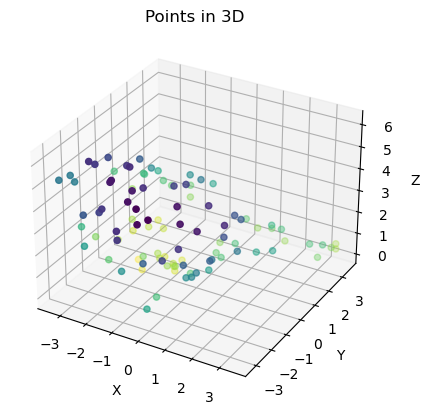

In [5]:
# Load the 3D model
mesh = trimesh.load_mesh(path_to_stl)
mesh = rotateMesh(mesh, (90,0,135), (0,0,0)) 
# Define the point of view
point_of_view = np.array([15, -15, 15])
points, distances = POV(mesh = mesh, point_of_view =point_of_view, num_points= 100)
plotPoints(points, distances)

# Plot

In [6]:
# Make the front position 'on the screen'
d = distances - min(distances)
print(d[:10])

[3.62992119 4.10934793 3.02915855 3.22235066 0.58976123 3.30089696
 3.71306061 0.67420151 0.69563047 3.10233487]


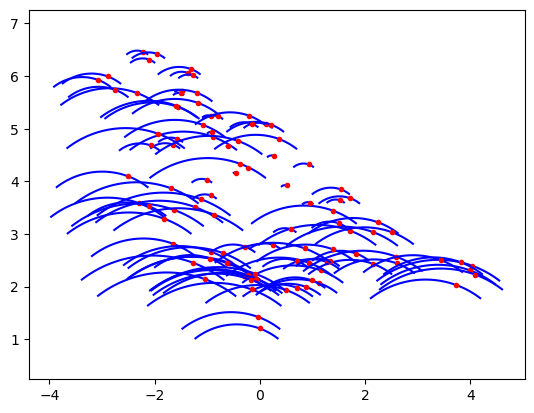

In [7]:
for i in range(len(d)):
    draw_partial_arch(radius=d[i]/2, center=(points[i][0],points[i][2]), angle=75, middle_angle=90)
    plot_dot_on_arch(radius=d[i]/2, center=(points[i][0],points[i][2]), angle=70, middle_angle=90)
plt.show()

# Plot and Save Animation

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

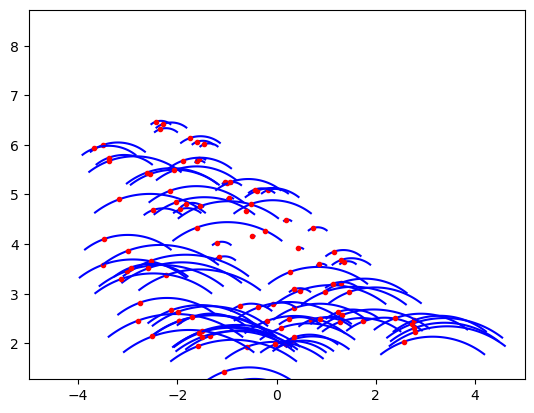

In [10]:
# Generate some random data for each figure
num_figures = 10
angles = np.linspace(70,110,num_figures)


# Create a list of figure objects
figures = [plt.figure() for _ in range(num_figures)]
 
# Function to update the plot for each frame of the animation
def update(frame):
    plt.clf()  # Clear the current figure
    angle = angles[frame]
    for i in range(len(d)):
        draw_partial_arch(radius=d[i]/2, center=(points[i][0],points[i][2]), angle=75, middle_angle=90)
        plot_dot_on_arch(radius=d[i]/2, center=(points[i][0],points[i][2]), angle=angle, middle_angle=0)
#         plt.plot([1],[frame], 'ro')
    plt.xlim([-5,5 ])    
    plt.ylim([0,10])
        # Create the animation
ani = FuncAnimation(plt.gcf(), update, frames=num_figures, interval=1000)
ani.save(name_ani+'_ani.gif', writer='pillow', fps=num_figures)
# Convert the animation to HTML
html = ani.to_jshtml()

# Display the HTML
HTML(html)